In [7]:
import pandas as pd
from scipy.stats import wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# Load NIAID queries

queries_df = pd.read_csv('./niaid_queries_revisited.csv', sep=',')
queries_df

,combination,search term,result id
0,original query,influenza,PRJNA658522
1,original query,influenza,PRJNA658529
2,original query,influenza,PRJNA658552
3,original query,influenza,PRJNA658564
4,original query,influenza,PRJNA658562
...,...,...,...
3995,c15,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,c15,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,c15,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,c15,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [9]:
# Drop combination column

queries_df = queries_df.drop('combination', axis = 1).copy()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3995,hiv,VIVLI_02021d26-0e96-424c-8fec-77cbd204fd8d
3996,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3997,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df
3998,hiv,VIVLI_242c4b5a-19b3-4a51-b885-05358ed89db6


In [10]:
# Drop duplicates

queries_df = queries_df.drop_duplicates()
queries_df

,search term,result id
0,influenza,PRJNA658522
1,influenza,PRJNA658529
2,influenza,PRJNA658552
3,influenza,PRJNA658564
4,influenza,PRJNA658562
...,...,...
3917,hiv,VIVLI_7a8a7234-ada3-465b-a608-347b5e74a542
3924,hiv,DRYAD_doi.org:10.5061:dryad.wpzgmsbnz
3936,hiv,DRYAD_doi.org:10.5061:dryad.np5hqbzx5
3968,hiv,VIVLI_7ac8687d-79c8-4860-8141-83776849e2df


In [11]:
# Load binary analysis

binary_df = pd.read_csv('./binary_analysis_revisited.csv', sep=',')
binary_df

,result id,original query,combi 1,combi 2,combi 3,combi 4,combi 5,combi 6,combi 7,combi 8,combi 9,combi 10,combi 11,combi 12,combi 13,combi 14,combi 15
0,S-EPMC6040727,12,12,12,12,0,0,12,12,0,0,0,0,0,0,0,0
1,Mendeley_pzp26k9fy7,0,0,0,0,0,0,0,0,0,14,14,0,0,0,0,0
2,DRYAD_doi.org:10.5061:dryad.9r35r,0,0,22,22,22,22,0,22,22,22,22,22,22,22,22,22
3,veupathdb_DS_e8c4cf2187,0,0,0,0,11,11,0,0,0,11,11,0,0,0,0,11
4,Dataverse_10.5064_F6SF2T3N,0,0,0,0,0,0,0,0,0,13,13,0,0,0,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,13
477,ZENODO_5008681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
478,S-EPMC6256666,17,17,0,0,0,0,17,0,0,0,0,17,0,0,0,0
479,IMMPORT_SDY1515_2,0,0,0,0,19,19,0,0,0,19,19,0,0,0,19,19


In [12]:
# Use shorter names for columns

binary_df.rename(columns = {'original query': 'original', 'combi 1': 'c1', 'combi 2': 'c2', 'combi 3': 'c3',
                            'combi 4': 'c4', 'combi 5': 'c5', 'combi 6': 'c6', 'combi 7': 'c7', 
                            'combi 8': 'c8', 'combi 9': 'c9', 'combi 10': 'c10', 'combi 11': 'c11', 
                            'combi 12': 'c12', 'combi 13': 'c13', 'combi 14': 'c14', 'combi 15': 'c15'
                           }, inplace = True)
binary_df

,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,S-EPMC6040727,12,12,12,12,0,0,12,12,0,0,0,0,0,0,0,0
1,Mendeley_pzp26k9fy7,0,0,0,0,0,0,0,0,0,14,14,0,0,0,0,0
2,DRYAD_doi.org:10.5061:dryad.9r35r,0,0,22,22,22,22,0,22,22,22,22,22,22,22,22,22
3,veupathdb_DS_e8c4cf2187,0,0,0,0,11,11,0,0,0,11,11,0,0,0,0,11
4,Dataverse_10.5064_F6SF2T3N,0,0,0,0,0,0,0,0,0,13,13,0,0,0,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,13
477,ZENODO_5008681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
478,S-EPMC6256666,17,17,0,0,0,0,17,0,0,0,0,17,0,0,0,0
479,IMMPORT_SDY1515_2,0,0,0,0,19,19,0,0,0,19,19,0,0,0,19,19


In [13]:
# Add search term info to binary analysis data

binary_df = binary_df.merge(queries_df[['result id', 'search term']], 
                            how = 'left', on = 'result id').copy()
binary_df

,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term
0,S-EPMC6040727,12,12,12,12,0,0,12,12,0,0,0,0,0,0,0,0,AIDS
1,Mendeley_pzp26k9fy7,0,0,0,0,0,0,0,0,0,14,14,0,0,0,0,0,AIDS
2,DRYAD_doi.org:10.5061:dryad.9r35r,0,0,22,22,22,22,0,22,22,22,22,22,22,22,22,22,AIDS
3,veupathdb_DS_e8c4cf2187,0,0,0,0,11,11,0,0,0,11,11,0,0,0,0,11,AIDS
4,Dataverse_10.5064_F6SF2T3N,0,0,0,0,0,0,0,0,0,13,13,0,0,0,13,13,AIDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,ZENODO_5044544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,13,zika microcephaly
477,ZENODO_5008681,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,zika microcephaly
478,S-EPMC6256666,17,17,0,0,0,0,17,0,0,0,0,17,0,0,0,0,zika microcephaly
479,IMMPORT_SDY1515_2,0,0,0,0,19,19,0,0,0,19,19,0,0,0,19,19,sublingual immunotherapy


In [14]:
duplicate_results = binary_df[binary_df.duplicated(['result id'])]
duplicate_results

,result id,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,search term


In [15]:
combination_order = ['original', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6',
                     'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13',
                     'c14', 'c15']

In [16]:
def compute_scores(df, combination_order):
    final_df = pd.DataFrame()

    for combi in combination_order:
        df_comb = df[['search term', combi]].copy()
        df_comb_sum = df_comb.groupby('search term').sum().reset_index()
        if final_df.empty:
            final_df = df_comb_sum
        else: 
            final_df = final_df.merge(df_comb_sum, on = 'search term')

    final_df.columns = ['search term'] + combination_order
    return final_df

In [17]:
def perform_wilcoxon_test(data):
    data = data.drop('search term', axis = 1)
    # Get the column names
    columns = data.columns
    
    # Initialize a list to hold the results
    results = []
    
    # Perform the Wilcoxon signed-rank test for each pair of columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            stat, p = wilcoxon(data[col1], data[col2])
            results.append((col1, col2, stat, p))
            
    # Create a DataFrame from the results
    results_df = pd.DataFrame(results, columns=['set 1', 'set 2', 'statistic', 'p-value'])
    return results_df

In [18]:
def compare_scores(scores, columns):
    score_comparisons = {}
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            set1 = columns[i]
            set2 = columns[j]
            if scores[set1] > scores[set2]:
                score_comparisons[(set1, set2)] = set1
            else:
                score_comparisons[(set1, set2)] = set2
    return score_comparisons

In [19]:
def add_winner(row):
    set1, set2 = row['set 1'], row['set 2']
    return winners[(set1, set2)]

In [20]:
def swap_sets(row):
    s1_index = combination_order.index(row['set 1'])
    s2_index = combination_order.index(row['set 2'])
    if s2_index < s1_index:
        return pd.Series([row['set 1'], row['set 2'], row['p-value']])  
    else:
        return pd.Series([row['set 2'], row['set 1'], row['p-value']])

In [21]:
def create_heatmap_with_winners(df, title, filename):
    heatmap_data = df.pivot('set 1', 'set 2', 'p-value')

    # Reorder index and columns
    heatmap_data = heatmap_data.reindex(combination_order, axis = 0)
    heatmap_data = heatmap_data.reindex(combination_order, axis = 1)

    # Combine winner and p-value in the annotation
    formatted_text = np.empty(heatmap_data.shape, dtype = object)
    
    for i in range(len(combination_order)):
        for j in range(len(combination_order)):
            if not np.isnan(heatmap_data.iloc[i, j]):
                formatted_text[i, j] = "{}\n{:.3f}".format(df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['winner'].values[0], df[(df['set 1'] == combination_order[i]) & (df['set 2'] == combination_order[j])]['p-value'].values[0])
        else:
            formatted_text[i, j] = ""

    # Create heatmap using seaborn
    sns.set(font_scale = 1.4)
    sns.set_style('white')
    plt.figure(figsize = (24, 12))
    sns.heatmap(heatmap_data, cmap='BuPu_r', annot=formatted_text, fmt="", cbar_kws={'label': 'p-values'})
    plt.title(f'{title} (Each cell displays both the winning combination and the p-value)')
    plt.savefig(f'../alternate_test/results/{filename}.png', dpi = 150, bbox_inches = 'tight')
    plt.show()

In [22]:
# Calculate scores per search term per combination

scores_binary_df = compute_scores(binary_df, combination_order)
scores_binary_df

,search term,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,AIDS,152,152,162,160,158,162,152,161,164,155,151,162,161,159,148,147
1,addison's disease,155,155,159,159,159,159,155,159,159,159,159,155,159,159,159,159
2,allergen skin prick test,148,148,148,148,148,148,148,148,148,148,145,148,148,148,148,145
3,allergy treatment,103,142,152,155,163,163,148,152,153,165,165,147,154,149,165,164
4,asthma,146,161,172,172,172,176,161,168,172,176,179,161,162,166,169,176
5,cancer,126,165,172,169,178,180,164,172,175,172,180,160,159,161,167,171
6,dendritic cells,155,172,182,181,179,187,172,182,181,179,186,172,173,177,175,178
7,gwas,120,178,183,180,182,185,178,183,181,182,182,178,183,181,183,181
8,hiv,84,165,164,168,170,206,165,184,186,186,186,183,185,185,185,185
9,immunotherapeutics,192,192,193,193,193,193,192,192,193,193,193,192,192,193,193,193


In [23]:
# Run Wilcoxon test

wilcoxon_binary_df = perform_wilcoxon_test(scores_binary_df)
wilcoxon_binary_df

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2967: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,set 1,set 2,statistic,p-value
0,original,c1,0.0,0.000289
1,original,c2,13.0,0.000143
2,original,c3,10.0,0.000098
3,original,c4,15.5,0.000194
4,original,c5,26.5,0.000693
...,...,...,...,...
115,c12,c14,51.0,0.608511
116,c12,c15,92.0,0.626905
117,c13,c14,51.0,0.608366
118,c13,c15,67.5,0.432440


In [24]:
# Export scores per search term

scores_binary_df.to_csv('../alternate_test/results/scores_binary.csv', index = False)

In [25]:
# Drop search term column

scores_only_binary_df = scores_binary_df.drop(columns = ['search term'])
scores_only_binary_df

,original,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,152,152,162,160,158,162,152,161,164,155,151,162,161,159,148,147
1,155,155,159,159,159,159,155,159,159,159,159,155,159,159,159,159
2,148,148,148,148,148,148,148,148,148,148,145,148,148,148,148,145
3,103,142,152,155,163,163,148,152,153,165,165,147,154,149,165,164
4,146,161,172,172,172,176,161,168,172,176,179,161,162,166,169,176
5,126,165,172,169,178,180,164,172,175,172,180,160,159,161,167,171
6,155,172,182,181,179,187,172,182,181,179,186,172,173,177,175,178
7,120,178,183,180,182,185,178,183,181,182,182,178,183,181,183,181
8,84,165,164,168,170,206,165,184,186,186,186,183,185,185,185,185
9,192,192,193,193,193,193,192,192,193,193,193,192,192,193,193,193


In [26]:
# Compute total scores per combination

total_scores_binary_df = scores_only_binary_df.sum()
total_scores_binary_df

original    3730
c1          4276
c2          4324
c3          4279
c4          4309
c5          4313
c6          4275
c7          4355
c8          4332
c9          4291
c10         4302
c11         4297
c12         4302
c13         4296
c14         4276
c15         4278
dtype: int64

In [27]:
# Determine winners by comparing combination scores

winners = compare_scores(total_scores_binary_df, combination_order)
winners

{('original', 'c1'): 'c1',
 ('original', 'c2'): 'c2',
 ('original', 'c3'): 'c3',
 ('original', 'c4'): 'c4',
 ('original', 'c5'): 'c5',
 ('original', 'c6'): 'c6',
 ('original', 'c7'): 'c7',
 ('original', 'c8'): 'c8',
 ('original', 'c9'): 'c9',
 ('original', 'c10'): 'c10',
 ('original', 'c11'): 'c11',
 ('original', 'c12'): 'c12',
 ('original', 'c13'): 'c13',
 ('original', 'c14'): 'c14',
 ('original', 'c15'): 'c15',
 ('c1', 'c2'): 'c2',
 ('c1', 'c3'): 'c3',
 ('c1', 'c4'): 'c4',
 ('c1', 'c5'): 'c5',
 ('c1', 'c6'): 'c1',
 ('c1', 'c7'): 'c7',
 ('c1', 'c8'): 'c8',
 ('c1', 'c9'): 'c9',
 ('c1', 'c10'): 'c10',
 ('c1', 'c11'): 'c11',
 ('c1', 'c12'): 'c12',
 ('c1', 'c13'): 'c13',
 ('c1', 'c14'): 'c14',
 ('c1', 'c15'): 'c15',
 ('c2', 'c3'): 'c2',
 ('c2', 'c4'): 'c2',
 ('c2', 'c5'): 'c2',
 ('c2', 'c6'): 'c2',
 ('c2', 'c7'): 'c7',
 ('c2', 'c8'): 'c8',
 ('c2', 'c9'): 'c2',
 ('c2', 'c10'): 'c2',
 ('c2', 'c11'): 'c2',
 ('c2', 'c12'): 'c2',
 ('c2', 'c13'): 'c2',
 ('c2', 'c14'): 'c2',
 ('c2', 'c15'): 'c2'

In [28]:
# Add winners to Wilcoxon test results

wilcoxon_binary_df['winner'] = wilcoxon_binary_df.apply(add_winner, axis = 1)
wilcoxon_binary_df

,set 1,set 2,statistic,p-value,winner
0,original,c1,0.0,0.000289,c1
1,original,c2,13.0,0.000143,c2
2,original,c3,10.0,0.000098,c3
3,original,c4,15.5,0.000194,c4
4,original,c5,26.5,0.000693,c5
...,...,...,...,...,...
115,c12,c14,51.0,0.608511,c12
116,c12,c15,92.0,0.626905,c12
117,c13,c14,51.0,0.608366,c13
118,c13,c15,67.5,0.432440,c13


In [29]:
wilcoxon_binary_df['winner'].value_counts()

c7     15
c8     14
c2     13
c5     12
c4     11
c12    10
c10     9
c11     8
c13     7
c9      6
c3      5
c15     4
c14     3
c1      2
c6      1
Name: winner, dtype: int64

In [30]:
wilcoxon_binary_df[wilcoxon_binary_df['p-value'] <= 0.05]

,set 1,set 2,statistic,p-value,winner
0,original,c1,0.0,0.000289,c1
1,original,c2,13.0,0.000143,c2
2,original,c3,10.0,0.000098,c3
3,original,c4,15.5,0.000194,c4
4,original,c5,26.5,0.000693,c5
5,original,c6,0.0,0.000291,c6
6,original,c7,0.0,0.000059,c7
7,original,c8,12.0,0.000126,c8
8,original,c9,15.0,0.000182,c9
9,original,c10,28.5,0.000516,c10


In [31]:
# Export Wilcoxon test results

wilcoxon_binary_df.to_csv('../alternate_test/results/wilcoxon_with_winners_binary.csv', index = False)

In [32]:
# Rearrange rows so that heatmap cells are rendered below the main diagonal

wilcoxon_binary_df[['set 1', 'set 2', 'p-value']] = wilcoxon_binary_df.apply(swap_sets, axis = 1)

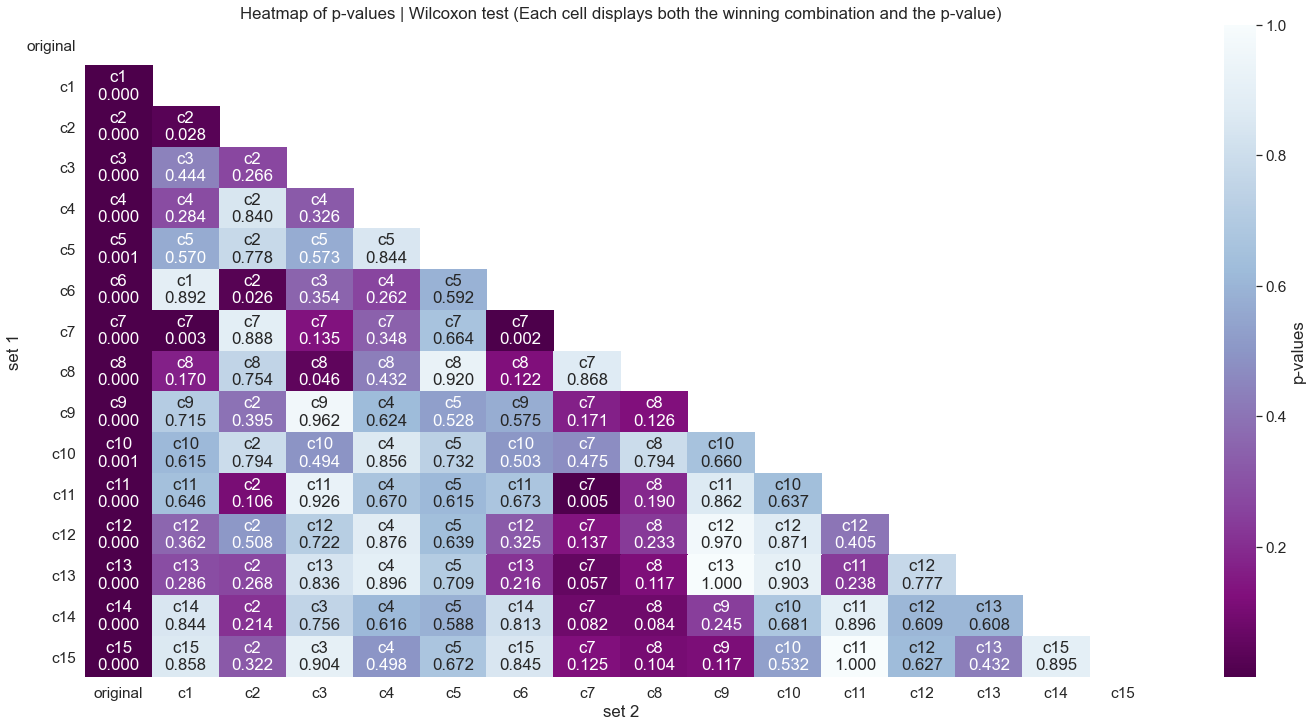

In [33]:
# Generate heatmap of p-values with winners

create_heatmap_with_winners(wilcoxon_binary_df, 'Heatmap of p-values | Wilcoxon test', 
                            'wilcoxon_heatmap_with_winners_binary')